In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [2]:
options ={
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3,
    'gpu':1.0
}
tf=TFNet(options)

F:\repo\yolo\ObjectDetection\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.2152423858642578s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1 

In [3]:
img=cv2.imread('dog.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result=tf.return_predict(img)
result

[{'label': 'bicycle',
  'confidence': 0.8053032,
  'topleft': {'x': 84, 'y': 115},
  'bottomright': {'x': 551, 'y': 463}},
 {'label': 'truck',
  'confidence': 0.8214264,
  'topleft': {'x': 461, 'y': 82},
  'bottomright': {'x': 698, 'y': 168}},
 {'label': 'dog',
  'confidence': 0.8229169,
  'topleft': {'x': 130, 'y': 215},
  'bottomright': {'x': 326, 'y': 535}}]

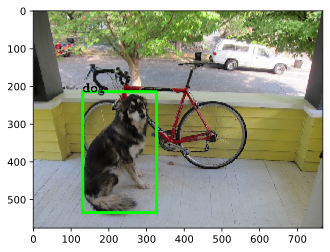

In [4]:
tl=(result[2]['topleft']['x'],result[2]['topleft']['y'])
br=(result[2]['bottomright']['x'],result[2]['bottomright']['y'])
img=cv2.rectangle(img,tl,br,(0,255,0),7)
img=cv2.putText(img,result[2]['label'],tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)

plt.imshow(img)
plt.show()

# That's all folks